<a href="https://colab.research.google.com/github/PratyushSinha8/Tweepy_Sentiment_Analysis/blob/main/Tweepy_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description : This is a sentiment analysis program parsing tweets fetched from Twitter using Python

In [ ]:
#Libraries
import tweepy

from textblob import TextBlob
from wordcloud import WordCloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

plt.style.use('fivethirtyeight')

In [ ]:
#Get the data
log=pd.read_csv('Tweepy_Keys.csv')


In [ ]:
#Twitter API Credentials
consumerKey=log['key'][0]
consumerSecret=log['key'][1]
accessTokent=log['key'][2]
accessTokenSecret=log['key'][3]

In [ ]:
#create authentication object
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)

#creating API object while passing in auth info
api= tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
#Exract 100 tweets from the twitter user
posts= api.user_timeline(screen_name='BarackObama',count=100, lang= 'en', tweet_mode='extended')

#Print last 5 tweets from this account
print('Show the last five tweets of the user: \n')

i=1
for tweet in posts[0:5]:
  print(str(i)+')'+tweet.full_text+ '\n')
  i=i+1

Show the last five tweets of the user: 

1)RT @POTUS: We can’t wait to tackle the climate crisis.

The signs are unmistakable. The science is undeniable. And the cost of inaction kee…

2)Congress needs to summon the same courage we saw a half century ago when the Voting Rights Act was passed and guarantee every American a voice and a vote.

3)The Voting Rights Act, signed into law 56 years ago today, was a monumental piece of legislation. But with the Supreme Court and state legislatures making it harder to cast a ballot, we can’t take voting rights for granted.

4)From the coal mines of Pennsylvania to the halls of Congress, Rich Trumka was a fierce advocate for working Americans. He loved this country, and he never missed an opportunity to remind us what we can be. Thinking of his family, friends, and federation on this difficult day.

5)RT @ObamaFoundation: Happy birthday, Mrs. Robinson! 🎂 

Watch President Obama reflect on a special moment he shared with his mother-in-law,…



In [ ]:
df=pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,RT @POTUS: We can’t wait to tackle the climate...
1,Congress needs to summon the same courage we s...
2,"The Voting Rights Act, signed into law 56 year..."
3,From the coal mines of Pennsylvania to the hal...
4,"RT @ObamaFoundation: Happy birthday, Mrs. Robi..."


In [ ]:
#Clean the text

#Create a function to clean the tweets
def cleantext(text):
  text=re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions
  text=re.sub(r'#', '', text) #Remove hashtags
  text=re.sub(r'https?:\/\/\S+', '', text) #Remove hyperlinks
  text=re.sub(r'RT[\s]+', '', text) #Remove Retweets



  return text
df['Tweets']=df['Tweets'].apply(cleantext)
df.head()



,Tweets
0,: We can’t wait to tackle the climate crisis.\...
1,Congress needs to summon the same courage we s...
2,"The Voting Rights Act, signed into law 56 year..."
3,From the coal mines of Pennsylvania to the hal...
4,": Happy birthday, Mrs. Robinson! 🎂 \n\nWatch P..."


In [ ]:
#Create a function to get the subjectivity (tells how subjective/opinionated the text is)

def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity (tells how positive/negative the text is) 

def getpolarity(text):
  return TextBlob(text).sentiment.polarity


In [ ]:
#Create Polarity and Subjectivity columns

df['Subjectivity']=df['Tweets'].apply(getsubjectivity)
df['Polarity']=df['Tweets'].apply(getpolarity)

#Checking newly created columns
df.head()

,Tweets,Subjectivity,Polarity
0,: We can’t wait to tackle the climate crisis.\...,0.000000,0.000000
1,Congress needs to summon the same courage we s...,0.097222,-0.055556
2,"The Voting Rights Act, signed into law 56 year...",0.000000,-0.100000
3,From the coal mines of Pennsylvania to the hal...,0.850000,0.191667
4,": Happy birthday, Mrs. Robinson! 🎂 \n\nWatch P...",0.785714,0.678571


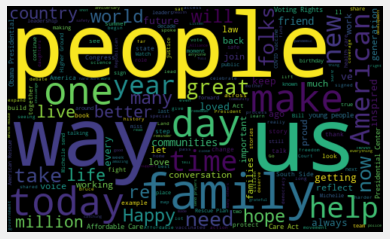

In [ ]:
#Plotting Word/Text Cloud to check the commonality of words
words=' '.join(tweet for tweet in df['Tweets'])
wordCloud=WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(words)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Function to compute the negative, neutral and positive analysis

def getanalysis(score):
  if score>0:
    return 'Positive'
  elif score==0:
    return 'Neutral'
  else:
    return 'Negative'

#Creating a column with Analysis
df['Analysis']=df['Polarity'].apply(getanalysis)




In [ ]:
df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,: We can’t wait to tackle the climate crisis.\...,0.000000,0.000000,Neutral
1,Congress needs to summon the same courage we s...,0.097222,-0.055556,Negative
2,"The Voting Rights Act, signed into law 56 year...",0.000000,-0.100000,Negative
3,From the coal mines of Pennsylvania to the hal...,0.850000,0.191667,Positive
4,": Happy birthday, Mrs. Robinson! 🎂 \n\nWatch P...",0.785714,0.678571,Positive


In [ ]:
sorted_p=df.sort_values(by='Polarity')
sorted_p['Analysis']

72    Negative
28    Negative
2     Negative
89    Negative
1     Negative
        ...   
61    Positive
93    Positive
4     Positive
57    Positive
36    Positive
Name: Analysis, Length: 100, dtype: object

In [ ]:
sorted_p=df.sort_values(by='Polarity')
j=1
for row in range (0, sorted_p.shape[0]):
  if sorted_p['Analysis'][row]=='Positive':
    print(str(j)+')'+sorted_p['Tweets'][row])
    print()
    j=j+1


1)From the coal mines of Pennsylvania to the halls of Congress, Rich Trumka was a fierce advocate for working Americans. He loved this country, and he never missed an opportunity to remind us what we can be. Thinking of his family, friends, and federation on this difficult day.

2): Happy birthday, Mrs. Robinson! 🎂 

Watch President Obama reflect on a special moment he shared with his mother-in-law,…

3)One of the things I’ve always loved about basketball is the fact that it brings people together and empowers young people everywhere. I’m proud to join the team at _Africa and look forward to seeing the change we can create across the continent. 

4)COVID-19 has gotten more contagious, so it’s more important than ever to get vaccinated. Vaccines are safe, and the best way to protect yourself and your loved ones. Go to  to find one near you.

5)Bob Moses was a hero of mine. His quiet confidence helped shape the civil rights movement, and he inspired generations of young people looking to

In [ ]:
sorted_n=df.sort_values(by='Polarity', ascending=True)
sorted_n.head()

,Tweets,Subjectivity,Polarity,Analysis
72,"The world’s attention must remain on Myanmar, ...",1.000000,-0.800000,Negative
28,The Senate is preparing to take action on a bi...,0.500000,-0.250000,Negative
2,"The Voting Rights Act, signed into law 56 year...",0.000000,-0.100000,Negative
89,Read about other developments from communities...,0.312500,-0.062500,Negative
1,Congress needs to summon the same courage we s...,0.097222,-0.055556,Negative


In [ ]:
#Print the negative tweets

sorted_n=df.sort_values(by=['Polarity'], ascending='True')
j=1
for row in range (0, sorted_n.shape[0]):
  if sorted_n['Analysis'][row]=='Negative':
    print(str(j)+')'+sorted_n['Tweets'][row])
    print()
    j=j+1
    

1)Congress needs to summon the same courage we saw a half century ago when the Voting Rights Act was passed and guarantee every American a voice and a vote.

2)The Voting Rights Act, signed into law 56 years ago today, was a monumental piece of legislation. But with the Supreme Court and state legislatures making it harder to cast a ballot, we can’t take voting rights for granted.

3)Congratulations to the  team on their ! I could not be prouder of the disability rights activists who inspired this film, the directors who brought their story to life, and our team at Higher Ground for their hard work. 

4)The Senate is preparing to take action on a bill that would strengthen our democracy, but Republican Senators are afraid to even debate it. This week,  and I had a chance to talk with folks across the country about what’s at stake – and how we can make a difference. 

5)On the 100th anniversary of the Tulsa Race Massacre, we remember all those who were killed and the survivors who brave

No handles with labels found to put in legend.


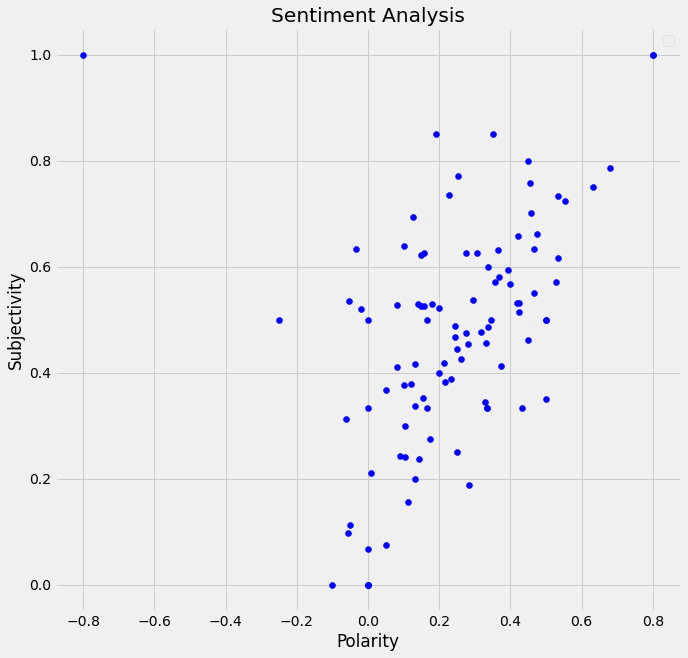

In [ ]:
#Plot polarity vs figure

plt.figure(figsize=(10,10))
for i in range (0, df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.legend()
plt.show()

In [ ]:
#Percentage and Ratio of polarity of tweets

ptweets=df[df['Analysis']=='Positive']['Tweets'].count()
ntweets=df[df['Analysis']=='Negative']['Tweets'].count()

ptweets_per=ptweets/df.shape[0]*100
ntweets_per=ntweets/df.shape[0]*100

ratio=ptweets/ntweets
f_ratio='{:.2f}'.format(ratio)

print('Percentage of positive tweets: '+ str(ptweets_per)+ '%')
print('Percentage of negative tweets: '+ str(ntweets_per)+'%')

print('Ratio of positive tweets vs negative tweets: '+ f_ratio)

Percentage of positive tweets: 84.0%
Percentage of negative tweets: 9.0%
Ratio of positive tweets vs negative tweets: 9.33


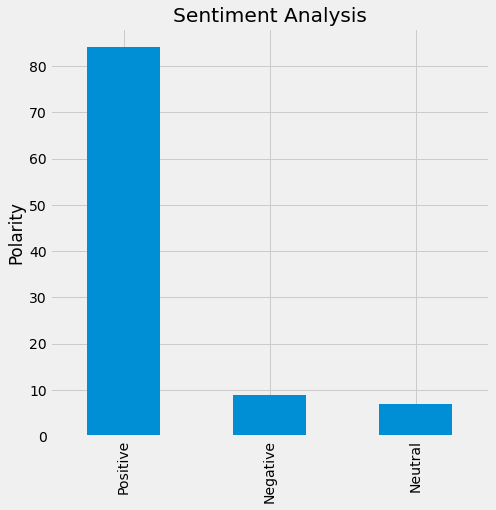

In [ ]:
#Plotting Bar Graph for Polarity of tweets

plt.figure(figsize=(7,7))
df['Analysis'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis')
plt.ylabel('No. of tweets')
plt.ylabel('Polarity')
plt.show()